## NJL model 

### Assuptions :
+ $\mu_r = \mu$
+ $G = g$

### Define Functions

In [2]:
import numpy as np
import scipy.integrate as integrate
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
# from mpl_toolkits import mplot3d

# 常数定义
m0 = 5.0  # 裸夸克质量 (MeV)
G = 13/12 * 5.074e-6  # 耦合常数 (MeV^-2)
p_max = 631.0  # 动量积分上限 (MeV)
# T = 10.0  # 温度 (MeV)
# mu = 400.0  # 化学势 (MeV)
N_c = 3
N_f = 2

# 费米分布函数
def n_f(E, mu, T):
    return 1 / (1 + np.exp((E - mu) / T))

def m_f(E, mu, T):
    return 1 / (1 + np.exp((E + mu) / T))

# 计算 sigma1 (包含 M 和 mu)
def sigma1_integral(M, mu, T):
    def integrand(p):
        E = np.sqrt(p**2 + M**2)
        return p**2 / E * (1 - n_f(E, mu, T) - m_f(E, mu, T))
    
    result, error = integrate.quad(integrand, 0, p_max)
    return -M*N_c*N_f*result / np.pi**2

# Gap 方程的迭代求解
def solve_gap_equation(mu,T,M_init=300, tolerance=1e-6, max_iter=1000):
    M = M_init
    for i in range(max_iter):
        sigma1_value = sigma1_integral(M, mu, T)  # 计算 sigma1
        M_new = m0 - 2 * G * sigma1_value  # 计算新的 M
        if np.abs(M_new - M) < tolerance:  # 判断是否收敛
            print(f"Converged after {i+1} iterations.")
            return M_new
        M = M_new  # 更新 M
    print("Max iterations reached.")
    return M

# # 运行求解
# M_solution = solve_gap_equation()
# print(f"Effective quark mass M: {M_solution:.5f} MeV")

#绘制T为定值时的M-mu 图像
def plot(T):

    mu_values = np.linspace(1,500,500) # mu
    M_values  = [solve_gap_equation(mu=mu,T=T) for mu in mu_values ]

    # plt.figure(figsize=(8, 6))
    plt.plot(mu_values, M_values, label=f'T = {T} MeV')
    plt.xlabel(r'Chemical potential $\mu$ (MeV)')
    plt.ylabel(r'Effective quark mass $M$ (MeV)')
    plt.title(r'$M$ vs $\mu$ at T = {0} MeV'.format(T))
    plt.grid(True)
    plt.legend()
    plt.savefig('T-mu.png',dpi=300)
    plt.show()

# plot M - (T,mu)




## plot M-T

Converged after 34 iterations.
Converged after 34 iterations.
Converged after 34 iterations.
Converged after 34 iterations.
Converged after 34 iterations.
Converged after 34 iterations.
Converged after 34 iterations.
Converged after 34 iterations.
Converged after 34 iterations.
Converged after 34 iterations.
Converged after 34 iterations.
Converged after 34 iterations.
Converged after 34 iterations.
Converged after 34 iterations.
Converged after 34 iterations.
Converged after 34 iterations.
Converged after 34 iterations.
Converged after 34 iterations.
Converged after 34 iterations.
Converged after 34 iterations.
Converged after 34 iterations.
Converged after 34 iterations.
Converged after 34 iterations.
Converged after 34 iterations.
Converged after 34 iterations.
Converged after 34 iterations.
Converged after 34 iterations.
Converged after 34 iterations.
Converged after 34 iterations.
Converged after 34 iterations.
Converged after 34 iterations.
Converged after 34 iterations.
Converge

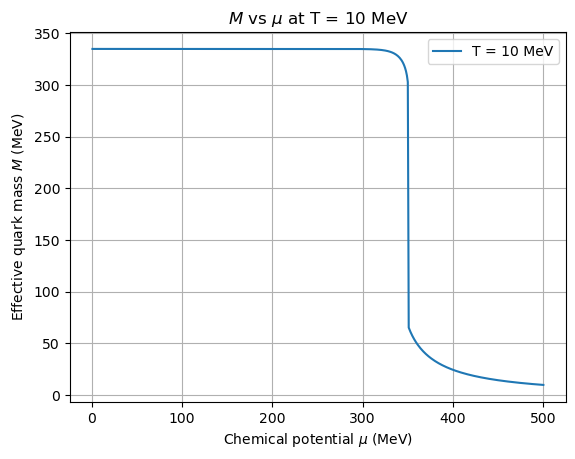

In [12]:
plot(T=10)

In [11]:

def plot3d():

    #create the figure
    # fig = plt.figure(figsize = ())
    # ax = plt.axes(projection='3d')    
    # fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

    mu_values = np.linspace(1,500,500)
    T_values = np.linspace(1,250,250)
    
    mu_grid , T_grid = np.meshgrid(mu_values,T_values)
    M_grid = np.zeros_like(T_grid)

    # calc the M
    for i in range(T_grid.shape[0]):
        for j in range(T_grid.shape[1]):
            M_grid[i,j] = solve_gap_equation(mu=mu_grid[i,j],T=T_grid[i,j])

    # 绘制 3D 图像
    fig = plt.figure(figsize=(10, 7))
    ax = plt.axes(projection='3d')
    # ax = fig.add_subplot(111, projection='3d')
    surf = ax.plot_surface( mu_grid,T_grid, M_grid, cmap='rainbow')
    ax.view_init(elev=30,azim=60)

    # 轴标签
    ax.set_xlabel(r'Temperature $T$ (MeV)')
    ax.set_ylabel(r'Chemical Potential $\mu$ (MeV)')
    ax.set_zlabel(r'Effective quark mass $M$ (MeV)')
    ax.set_title(r'$M(T, \mu)$ in NJL Model')

    fig.colorbar(surf,shrink=0.5,aspect=8)
    plt.savefig('M-muT.png',dpi=300)

    plt.show()



Converged after 44 iterations.
Converged after 44 iterations.
Converged after 44 iterations.
Converged after 44 iterations.
Converged after 44 iterations.
Converged after 44 iterations.
Converged after 44 iterations.
Converged after 44 iterations.
Converged after 44 iterations.
Converged after 44 iterations.
Converged after 44 iterations.
Converged after 44 iterations.
Converged after 44 iterations.
Converged after 44 iterations.
Converged after 44 iterations.
Converged after 44 iterations.
Converged after 44 iterations.
Converged after 44 iterations.
Converged after 44 iterations.
Converged after 44 iterations.
Converged after 44 iterations.
Converged after 44 iterations.
Converged after 44 iterations.
Converged after 44 iterations.
Converged after 44 iterations.
Converged after 44 iterations.
Converged after 44 iterations.
Converged after 44 iterations.
Converged after 44 iterations.
Converged after 44 iterations.
Converged after 44 iterations.
Converged after 44 iterations.
Converge

/tmp/ipykernel_11550/2670603424.py:21: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp((E + mu) / T))


Converged after 44 iterations.
Converged after 44 iterations.
Converged after 44 iterations.
Converged after 44 iterations.
Converged after 44 iterations.
Converged after 44 iterations.
Converged after 44 iterations.
Converged after 44 iterations.
Converged after 44 iterations.
Converged after 44 iterations.
Converged after 44 iterations.
Converged after 44 iterations.
Converged after 44 iterations.
Converged after 44 iterations.
Converged after 44 iterations.
Converged after 44 iterations.
Converged after 44 iterations.
Converged after 44 iterations.
Converged after 44 iterations.
Converged after 44 iterations.
Converged after 44 iterations.
Converged after 44 iterations.
Converged after 44 iterations.
Converged after 44 iterations.
Converged after 44 iterations.
Converged after 44 iterations.
Converged after 44 iterations.
Converged after 44 iterations.
Converged after 44 iterations.
Converged after 44 iterations.
Converged after 44 iterations.
Converged after 44 iterations.
Converge

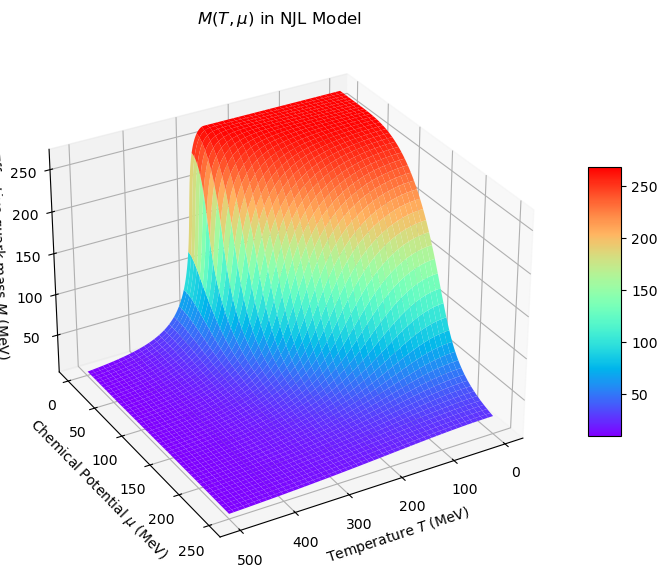

In [12]:
plot3d()

## 坐标轴标错了😭 视角错了😭😭

In [4]:

def plot3d():

    #create the figure
    # fig = plt.figure(figsize = ())
    # ax = plt.axes(projection='3d')    
    # fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

    mu_values = np.linspace(1,500,10)
    T_values = np.linspace(1,250,10)
    
    mu_grid , T_grid = np.meshgrid(mu_values,T_values)
    M_grid = np.zeros_like(T_grid)

    # calc the M
    for i in range(T_grid.shape[0]):
        for j in range(T_grid.shape[1]):
            M_grid[i,j] = solve_gap_equation(mu=mu_grid[i,j],T=T_grid[i,j])

    # 绘制 3D 图像
    fig = plt.figure(figsize=(12, 8))
    # ax = plt.axes(projection='3d')
    ax = fig.add_subplot(111, projection='3d')
    surf = ax.plot_surface( mu_grid,T_grid, M_grid, cmap='rainbow')
    ax.view_init(elev=15,azim=-25)
    ax.set_zlim(0,400)

    # 轴标签
    ax.set_xlabel(r'Chemical Potential $\mu$ (MeV)')
    ax.set_ylabel(r'Temperature $T$ (MeV)')
    ax.set_zlabel(r'Effective quark mass $M$ (MeV)')
    ax.set_title(r'$M(T, \mu)$ in NJL Model')

    fig.colorbar(surf,shrink=0.5,aspect=8)
    # save the figure
    # plt.savefig('M-muT.png',dpi=300)

    plt.show()


Converged after 44 iterations.
Converged after 44 iterations.
Converged after 44 iterations.
Converged after 44 iterations.
Converged after 44 iterations.
Converged after 81 iterations.
Converged after 157 iterations.


/tmp/ipykernel_2119/3066399667.py:20: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp((E + mu) / T))


Converged after 70 iterations.
Converged after 41 iterations.
Converged after 26 iterations.
Converged after 44 iterations.
Converged after 44 iterations.
Converged after 44 iterations.
Converged after 44 iterations.
Converged after 50 iterations.
Converged after 150 iterations.
Converged after 143 iterations.
Converged after 67 iterations.
Converged after 40 iterations.
Converged after 26 iterations.
Converged after 44 iterations.
Converged after 45 iterations.
Converged after 47 iterations.
Converged after 53 iterations.
Converged after 77 iterations.
Converged after 364 iterations.
Converged after 117 iterations.
Converged after 61 iterations.
Converged after 38 iterations.
Converged after 26 iterations.
Converged after 49 iterations.
Converged after 51 iterations.
Converged after 57 iterations.
Converged after 73 iterations.
Converged after 144 iterations.
Converged after 206 iterations.
Converged after 94 iterations.
Converged after 56 iterations.
Converged after 37 iterations.
Co

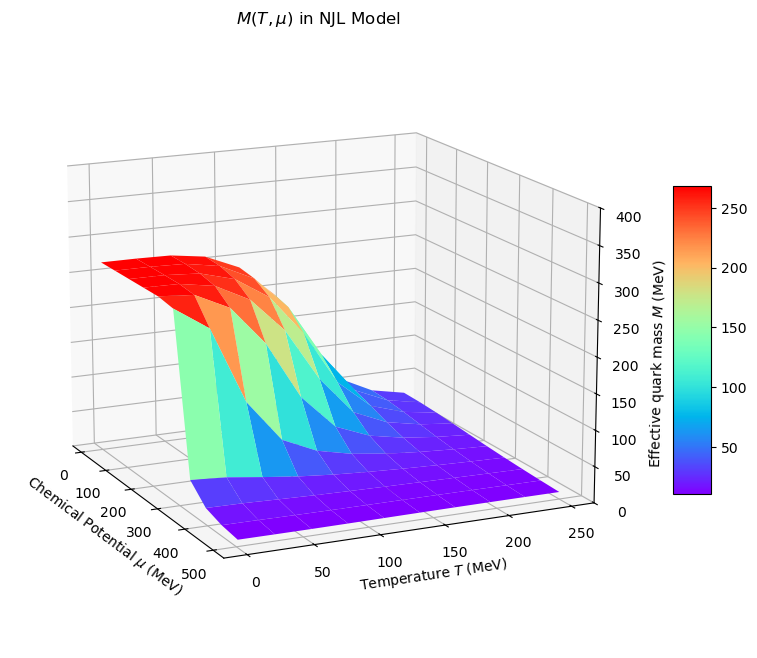

In [5]:
plot3d()

In [2]:

def plot3d():

    mu_values = np.linspace(1,500,25)
    T_values = np.linspace(1,250,20)
    
    mu_grid , T_grid = np.meshgrid(mu_values,T_values)
    M_grid = np.zeros_like(T_grid)

    # calc the M
    for i in range(T_grid.shape[0]):
        for j in range(T_grid.shape[1]):
            M_grid[i,j] = solve_gap_equation(mu=mu_grid[i,j],T=T_grid[i,j])

    # 绘制 3D 图像
    fig = plt.figure(figsize=(12, 8))
    ax = plt.axes(projection='3d')
    # ax = fig.add_subplot(111, projection='3d')
    surf = ax.plot_surface( mu_grid,T_grid, M_grid, cmap='rainbow')
    ax.view_init(elev=15,azim=-25)
    ax.set_zlim(0,400)

    # 轴标签
    ax.set_xlabel(r'Chemical Potential $\mu$ (MeV)')
    ax.set_ylabel(r'Temperature $T$ (MeV)')
    ax.set_zlabel(r'Effective quark mass $M$ (MeV)')
    ax.set_title(r'$M(T, \mu)$ in NJL Model')

    fig.colorbar(surf,shrink=0.5,aspect=8)
    # plt.savefig('M-muT.png',dpi=300)

    plt.show()


Converged after 44 iterations.
Converged after 44 iterations.
Converged after 44 iterations.
Converged after 44 iterations.
Converged after 44 iterations.
Converged after 44 iterations.
Converged after 44 iterations.
Converged after 44 iterations.
Converged after 44 iterations.
Converged after 44 iterations.
Converged after 44 iterations.
Converged after 44 iterations.
Converged after 44 iterations.
Converged after 55 iterations.


/tmp/ipykernel_2119/3066399667.py:20: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp((E + mu) / T))


Converged after 260 iterations.
Converged after 280 iterations.
Converged after 157 iterations.
Converged after 109 iterations.
Converged after 83 iterations.
Converged after 65 iterations.
Converged after 53 iterations.
Converged after 44 iterations.
Converged after 37 iterations.
Converged after 31 iterations.
Converged after 26 iterations.
Converged after 44 iterations.
Converged after 44 iterations.
Converged after 44 iterations.
Converged after 44 iterations.
Converged after 44 iterations.
Converged after 44 iterations.
Converged after 44 iterations.
Converged after 44 iterations.
Converged after 44 iterations.
Converged after 44 iterations.
Converged after 44 iterations.
Converged after 45 iterations.
Converged after 49 iterations.
Converged after 71 iterations.
Converged after 351 iterations.
Converged after 266 iterations.
Converged after 153 iterations.
Converged after 108 iterations.
Converged after 82 iterations.
Converged after 65 iterations.
Converged after 53 iterations.


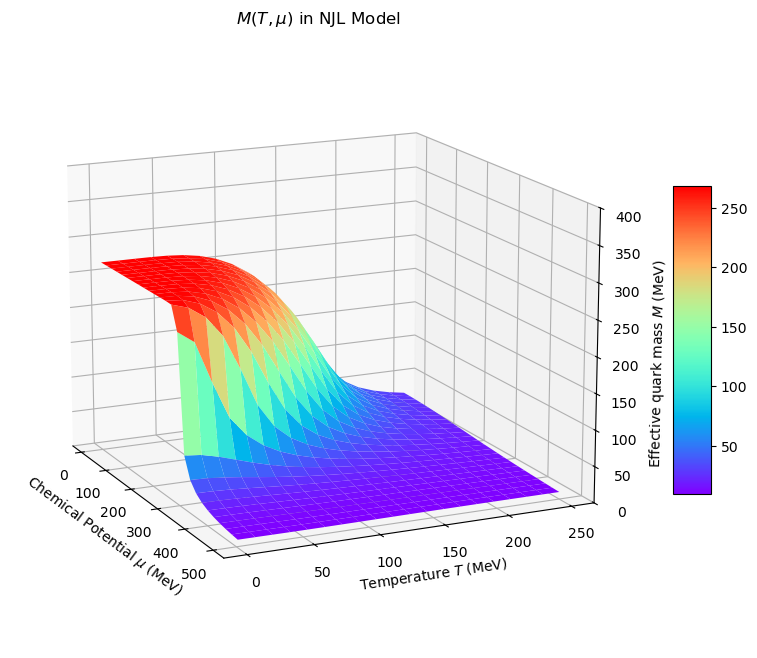

In [3]:
plot3d()

## Can I use fsolve instead of iteration?

well, actually the fsolve() use iterative way too

In [5]:
from scipy.optimize import fsolve
import numpy as np

In [6]:
def gap_equation(M,mu,T):

    return M - m0 + 2*G*sigma1_integral(M,mu,T)

In [6]:
mu = 10
T = 10
result = gap_equation(300,mu,T)
print(result)

11.02844937603578


In [7]:
M_init = 300
M_solution = fsolve(gap_equation,M_init,args=(mu,T))
print(M_solution)

[268.30315618]


try to plot the $M - \mu$ firgure

In [8]:
T = 10
G = 13/12 * 5.074e-6
mu_values = np.linspace(1,500,250)
M_solutions = [fsolve(gap_equation,M_init,args=(mu,T)) for mu in mu_values]


/tmp/ipykernel_2098/3853780902.py:4: RuntimeWarning: The iteration is not making good progress, as measured by the 
 improvement from the last five Jacobian evaluations.
  M_solutions = [fsolve(gap_equation,M_init,args=(mu,T)) for mu in mu_values]
/tmp/ipykernel_2098/3853780902.py:4: RuntimeWarning: The iteration is not making good progress, as measured by the 
 improvement from the last ten iterations.
  M_solutions = [fsolve(gap_equation,M_init,args=(mu,T)) for mu in mu_values]
/tmp/ipykernel_2098/3066399667.py:20: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp((E + mu) / T))
/tmp/ipykernel_2098/3066399667.py:17: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp((E - mu) / T))


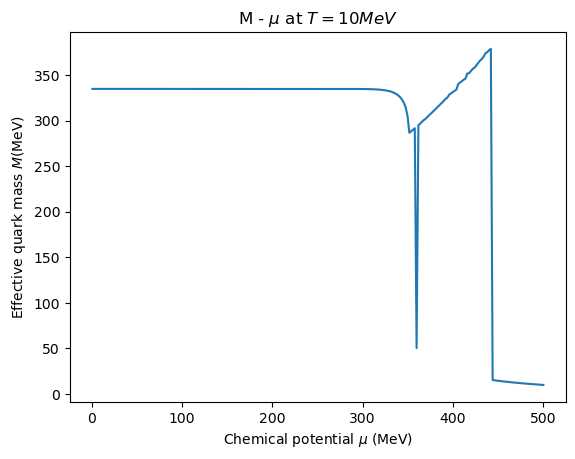

In [9]:
fig, ax = plt.subplots()
ax.set_xlabel(r"Chemical potential $\mu$ (MeV)")
ax.set_ylabel(r"Effective quark mass $M$(MeV)")
ax.set_title(r"M - $\mu$ at $T=10 MeV $")
plt.plot(mu_values,M_solutions)

I want try to plot the 3d figrure with fsolve

In [32]:
def f_plot3d():
    
    mu_values = np.array([1,2,3])
    T_values = np.array([1,2,3,4])
    
    mu_grid , T_grid = np.meshgrid(mu_values,T_values)
    M_grid = np.zeros_like(T_grid)

    print(mu_grid)
    print("T")
    print(T_grid)
    print("Add")
    print(np.dstack((mu_grid,T_grid)))


f_plot3d()

    

[[1 2 3]
 [1 2 3]
 [1 2 3]
 [1 2 3]]
T
[[1 1 1]
 [2 2 2]
 [3 3 3]
 [4 4 4]]
Add
[[[1 1]
  [2 1]
  [3 1]]

 [[1 2]
  [2 2]
  [3 2]]

 [[1 3]
  [2 3]
  [3 3]]

 [[1 4]
  [2 4]
  [3 4]]]


## Try to get the multisolutions

In [20]:
#define the gap equation
def gap_eq(M,mu,T):
    return M - m0 + 2*G*sigma1_integral(M,mu,T)


In [21]:
#determine where is the M when the multi-solution occur
def f_values():
    mu = 355 # MeV
    T = 1 #MeV
    M_values = np.linspace(0,400,100)
    f_values = [gap_eq(M,mu,T) for M in M_values]

    plt.plot(M_values,f_values,label='Gap Equation')
    plt.axhline(0, color='k', linestyle='--')
    plt.xlabel("M (MeV)")
    plt.ylabel("Gap Function f(M)")
    plt.legend()
    plt.show()

/tmp/ipykernel_3688/2126163256.py:21: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp((E + mu) / T))


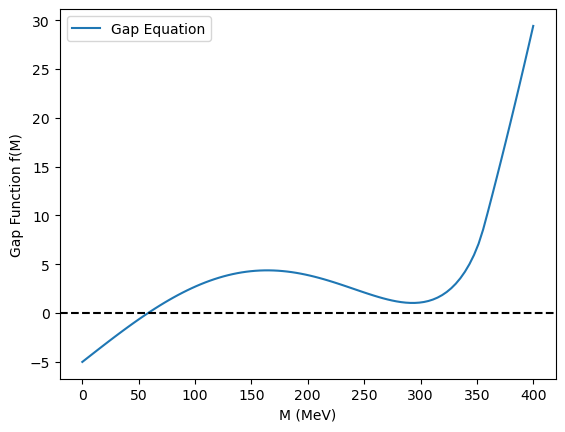

In [22]:
f_values()

In [10]:
def multi_solve():

    T_values = np.linspace(1,40,20)
    mu_values = np.linspace(340,360,20)
    M_init0 = 300   #MeV
    M_init1 = 60    #MeV

    mu_grid, T_grid = np.meshgrid(mu_values,T_values)
    solution_grid0 = np.zeros_like(T_grid)
    solution_grid1 = np.zeros_like(T_grid)

    for i in range(T_grid.shape[0]):
        for j in range(T_grid.shape[1]):
            solution_grid0[i,j] = fsolve(gap_eq,M_init0,args=(mu_grid[i,j],T_grid[i,j]))[0]
            solution_grid1[i,j] = fsolve(gap_eq,M_init1,args=(mu_grid[i,j],T_grid[i,j]))[0]

    np.save('solution_grid0.npy',solution_grid0)
    np.save('solution_grid1.npy',solution_grid1)

    result = np.isclose(solution_grid0,solution_grid1,rtol=1e-4)
    return result
 

In [11]:
Z = multi_solve()

/tmp/ipykernel_29502/2126163256.py:21: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp((E + mu) / T))
/tmp/ipykernel_29502/2425979735.py:15: RuntimeWarning: The iteration is not making good progress, as measured by the 
 improvement from the last ten iterations.
  solution_grid1[i,j] = fsolve(gap_eq,M_init1,args=(mu_grid[i,j],T_grid[i,j]))[0]
/tmp/ipykernel_29502/2425979735.py:14: RuntimeWarning: The iteration is not making good progress, as measured by the 
 improvement from the last ten iterations.
  solution_grid0[i,j] = fsolve(gap_eq,M_init0,args=(mu_grid[i,j],T_grid[i,j]))[0]
/tmp/ipykernel_29502/2425979735.py:14: RuntimeWarning: The iteration is not making good progress, as measured by the 
 improvement from the last five Jacobian evaluations.
  solution_grid0[i,j] = fsolve(gap_eq,M_init0,args=(mu_grid[i,j],T_grid[i,j]))[0]
/tmp/ipykernel_29502/2425979735.py:15: RuntimeWarning: The iteration is not making good progress, as measured by the 
 improvement from t

In [12]:
Z

array([[False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False,  True,
        False, False],
       [False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False,  True,
        False, False],
       [False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False,  True,
        False, False],
       [False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False],
       [False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
         True, False],
       [False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
         True,  True],
       [Fa

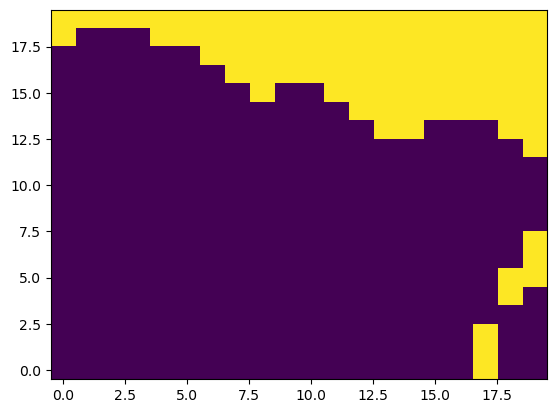

In [13]:
fig,ax = plt.subplots()

ax.imshow(Z,aspect='auto',origin='lower')

plt.show()

In [8]:
def multi_solve():

    nx = 20
    ny = 20
    T_values = np.linspace(1,40,ny)
    mu_values = np.linspace(320,360,nx)
    M_init0 = 300   #MeV
    M_init1 = 60    #MeV

    solution_grid = np.zeros((20,20))

    for i in range(nx):
        for j in range(ny):
            solution0 = fsolve(gap_eq,M_init0,args=(mu_values[i],T_values[j]))[0]
            solution1 = fsolve(gap_eq,M_init1,args=(mu_values[i],T_values[j]))[0]
            if np.abs(solution0 - solution1) < 1e-1:
                solution_grid[i,j] = 1
            else:
                solution_grid[i,j] = 0

    
    # 绘制结果
    plt.figure(figsize=(8, 6))

    # 使用imshow绘制多解区
    plt.imshow(solution_grid.T, origin='lower', extent=[mu_values[0], mu_values[-1], T_values[0], T_values[-1]], aspect='auto')
    plt.colorbar(label='Multi-solution region (1 = Multi-solution, 0 = Single-solution)')

    # 标注
    plt.xlabel(r'Chemical Potential $\mu$')
    plt.ylabel(r'Temperature $T$')
    plt.title(r'Multi-solution Regions in $T$-$\mu$ Plane')

    # 显示图像
    plt.show()

/tmp/ipykernel_29502/2126163256.py:21: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp((E + mu) / T))
/tmp/ipykernel_29502/2126163256.py:18: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp((E - mu) / T))
/tmp/ipykernel_29502/395804068.py:15: RuntimeWarning: The iteration is not making good progress, as measured by the 
 improvement from the last ten iterations.
  solution1 = fsolve(gap_eq,M_init1,args=(mu_values[i],T_values[j]))[0]
/tmp/ipykernel_29502/395804068.py:15: RuntimeWarning: The iteration is not making good progress, as measured by the 
 improvement from the last five Jacobian evaluations.
  solution1 = fsolve(gap_eq,M_init1,args=(mu_values[i],T_values[j]))[0]
/tmp/ipykernel_29502/395804068.py:14: RuntimeWarning: The iteration is not making good progress, as measured by the 
 improvement from the last ten iterations.
  solution0 = fsolve(gap_eq,M_init0,args=(mu_values[i],T_values[j]))[0]
/tmp/ipykernel_29502/395804068.py:14: RuntimeWa

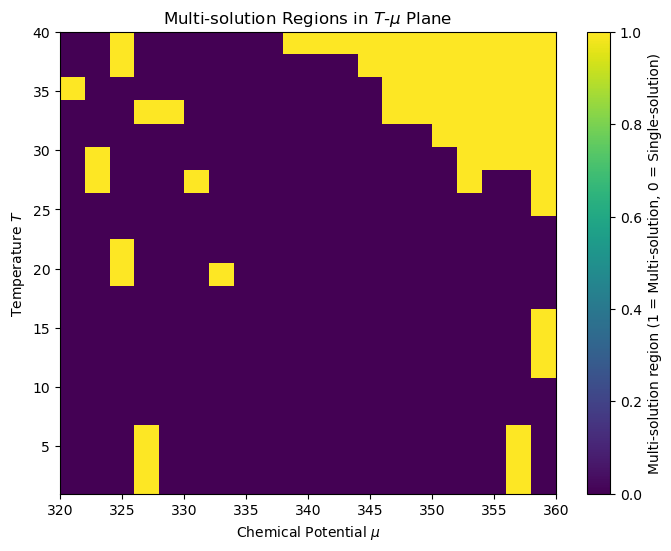

In [9]:
multi_solve()

In [16]:
data1 = np.load('solution_grid0.npy')
data2 = np.load('solution_grid1.npy')

In [15]:
data1

array([[333.14412113, 332.43304556, 331.57549606, 330.55174286,
        329.33462066, 327.88654011, 326.15406613, 324.05772804,
        321.47108589, 318.17119045, 313.69105199, 306.6245434 ,
        291.08932396, 291.9764651 , 292.42294819, 294.08708745,
        294.66667286,  53.51810938, 296.44530169, 297.29864185],
       [332.49118185, 331.79587503, 330.95186514, 329.93609046,
        328.71931815, 327.2623198 , 325.5096158 , 323.37816641,
        320.73425054, 317.33791255, 312.67162483, 305.05712921,
        290.80548034, 291.70043104, 292.24827012, 293.32621969,
        294.365125  ,  53.46018583, 296.20359072, 297.07582432],
       [331.35455767, 330.62001854, 329.74490356, 328.70231096,
        327.45801703, 325.96664629, 324.16486155, 321.95831974,
        319.19379012, 315.58873434, 310.4952861 , 301.35671613,
        290.26158725, 291.10439637, 291.92343444, 292.82047496,
        293.80259741,  53.34402509, 295.63791972, 296.52715161],
       [329.86648277, 329.04867082, 3

In [17]:
data2

array([[131.41062522, 134.00514375, 107.50064029,  97.82781515,
         90.93451996,  85.46559489,  80.89873632,  76.96686608,
         73.51168147,  70.43023857,  67.65116335,  65.12258537,
         62.80542343,  60.66937968,  58.69041557,  56.84909013,
         55.12942563,  53.51810938,  52.00391737,  50.57728872],
       [131.54897937, 128.50476355, 106.9946716 ,  97.50364843,
         90.68977821,  85.26744467,  80.73186991,  76.8227227 ,
         73.38491729,  70.31726118,  67.54942501,  65.03020448,
         62.72096559,  60.59172308,  58.61866428,  56.78251594,
         55.06742776,  53.46018583,  51.94964395,  50.52630353],
       [131.8165794 , 124.05126182, 106.01524194,  96.86485343,
         90.20442893,  84.87320047,  80.39919886,  76.53495931,
         73.13159746,  70.09132142,  67.34584047,  64.84525544,
         62.55181102,  60.43613775,  58.47486873,  56.64906231,
         54.94312049,  53.34402509,  51.84078438,  50.42402343],
       [132.4242233 , 119.96773256, 1

## use basic iteration way to solve 

In [7]:
def multi_solve():
    mu_values = np.linspace(340,360,20)
    T_values = np.linspace(1,40,20)
    M_init0 = 300
    M_init1 = 60

    mu_grid, T_grid = np.meshgrid(mu_values,T_values)
    M_grid0 = np.zeros_like(T_grid)
    M_grid1 = np.zeros_like(T_grid)

    for i in range(T_grid.shape[0]):
        for j in range(T_grid.shape[1]):
            M_grid0[i,j] = solve_gap_equation(mu_grid[i,j],T_grid[i,j],M_init=M_init0)
            M_grid1[i,j] = solve_gap_equation(mu_grid[i,j],T_grid[i,j],M_init=M_init1)

    np.save('M_grid0.npy',M_grid0)
    np.save('M_grid1.npy',M_grid1)

    return [M_grid0,M_grid1]


In [8]:
multi_solve()

/tmp/ipykernel_3688/2126163256.py:21: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp((E + mu) / T))


Converged after 62 iterations.
Converged after 327 iterations.
Converged after 67 iterations.
Max iterations reached.
Converged after 73 iterations.
Converged after 649 iterations.
Converged after 79 iterations.
Converged after 468 iterations.
Converged after 86 iterations.
Converged after 384 iterations.
Converged after 95 iterations.
Converged after 332 iterations.
Converged after 106 iterations.
Converged after 295 iterations.
Converged after 120 iterations.
Converged after 266 iterations.
Converged after 139 iterations.
Converged after 243 iterations.
Converged after 167 iterations.
Converged after 223 iterations.
Converged after 215 iterations.
Converged after 206 iterations.
Converged after 329 iterations.
Converged after 189 iterations.
Converged after 469 iterations.
Converged after 172 iterations.
Converged after 318 iterations.
Converged after 145 iterations.
Converged after 279 iterations.
Converged after 148 iterations.
Converged after 256 iterations.
Converged after 153 it

[array([[333.14411853, 332.43304259, 331.575493  , 330.55173909,
         329.334616  , 327.88653493, 326.15406023, 324.0577211 ,
         321.47107757, 318.17118005, 313.69103811, 306.62451916,
          62.80543636,  60.66939211,  58.69042744,  56.84910148,
          55.12943679,  53.51811984,  52.00392734,  50.5772978 ],
        [332.49117898, 331.79587176, 330.95186167, 329.93608686,
         328.71931342, 327.26231511, 325.50961004, 323.37815999,
         320.73424198, 317.33790225, 312.67161013, 305.05710158,
          62.72097902,  60.59173572,  58.61867604,  56.78252701,
          55.06743807,  53.46019564,  51.9496534 ,  50.52631307],
        [331.35455525, 330.62001525, 329.74490026, 328.70230676,
         327.45801245, 325.96664144, 324.16485593, 321.95831255,
         319.19378179, 315.58872276, 310.49526937, 301.35667899,
          62.55182356,  60.43615022,  58.47488058,  56.64907386,
          54.94313098,  53.34403544,  51.84079461,  50.42403301],
        [329.86647971,

In [9]:
M_grid0 = np.load('M_grid0.npy')
M_grid1 = np.load('M_grid1.npy') 

In [10]:
M_grid0

array([[333.14411853, 332.43304259, 331.575493  , 330.55173909,
        329.334616  , 327.88653493, 326.15406023, 324.0577211 ,
        321.47107757, 318.17118005, 313.69103811, 306.62451916,
         62.80543636,  60.66939211,  58.69042744,  56.84910148,
         55.12943679,  53.51811984,  52.00392734,  50.5772978 ],
       [332.49117898, 331.79587176, 330.95186167, 329.93608686,
        328.71931342, 327.26231511, 325.50961004, 323.37815999,
        320.73424198, 317.33790225, 312.67161013, 305.05710158,
         62.72097902,  60.59173572,  58.61867604,  56.78252701,
         55.06743807,  53.46019564,  51.9496534 ,  50.52631307],
       [331.35455525, 330.62001525, 329.74490026, 328.70230676,
        327.45801245, 325.96664144, 324.16485593, 321.95831255,
        319.19378179, 315.58872276, 310.49526937, 301.35667899,
         62.55182356,  60.43615022,  58.47488058,  56.64907386,
         54.94313098,  53.34403544,  51.84079461,  50.42403301],
       [329.86647971, 329.04866773, 3

In [11]:
M_grid1

array([[333.1441184 , 132.02712814, 107.50059269,  97.82778124,
         90.93449274,  85.46557188,  80.89871611,  76.9668474 ,
         73.51166453,  70.43022263,  67.65114899,  65.12257152,
         62.80541075,  60.66936734,  58.69042696,  56.84910096,
         55.12943639,  53.51811957,  52.00392737,  50.57729832],
       [332.49117935, 128.31655555, 106.99462486,  97.50361568,
         90.68975091,  85.26742161,  80.73184916,  76.82270414,
         73.38490027,  70.31724504,  67.54941038,  65.03019033,
         62.7209527 ,  60.59171065,  58.61867605,  56.78252677,
         55.06743844,  53.46019591,  51.94965383,  50.526313  ],
       [331.35455525, 124.04058151, 106.01519667,  96.86482066,
         90.2044023 ,  84.87317725,  80.3991789 ,  76.53494096,
         73.13158029,  70.09130583,  67.34582624,  64.84524166,
         62.55179775,  60.43612585,  58.47488026,  56.64907313,
         54.943131  ,  53.34403495,  51.84079402,  50.42403267],
       [329.86648018, 119.9671656 , 1

In [12]:
solution_grid = np.isclose(M_grid0,M_grid1,rtol=1e-4)

In [13]:
solution_grid

array([[ True, False, False, False, False, False, False, False, False,
        False, False, False,  True,  True,  True,  True,  True,  True,
         True,  True],
       [ True, False, False, False, False, False, False, False, False,
        False, False, False,  True,  True,  True,  True,  True,  True,
         True,  True],
       [ True, False, False, False, False, False, False, False, False,
        False, False, False,  True,  True,  True,  True,  True,  True,
         True,  True],
       [ True, False, False, False, False, False, False, False, False,
        False, False, False,  True,  True,  True,  True,  True,  True,
         True,  True],
       [ True, False, False, False, False, False, False, False, False,
        False, False,  True,  True,  True,  True,  True,  True,  True,
         True,  True],
       [ True, False, False, False, False, False, False, False, False,
        False,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True],
       [Fa

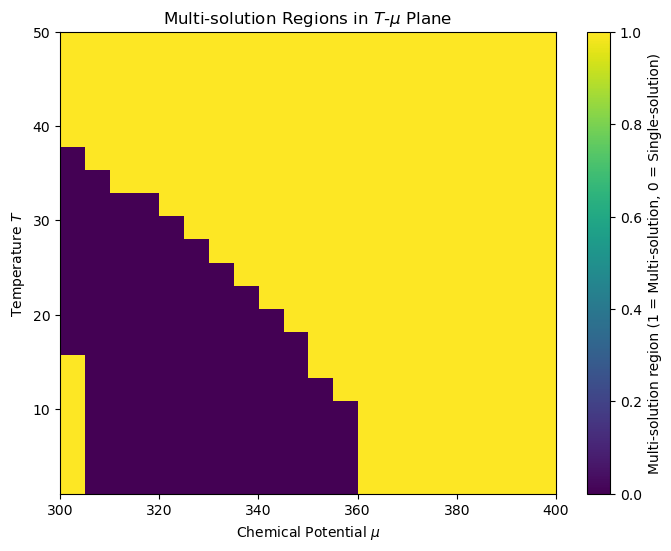

In [17]:
 # 绘制结果
plt.figure(figsize=(8, 6))

# 使用imshow绘制多解区
plt.imshow(solution_grid, origin='lower', extent=[300,400,1,50], aspect='auto')
plt.colorbar(label='Multi-solution region (1 = Multi-solution, 0 = Single-solution)')

# 标注
plt.xlabel(r'Chemical Potential $\mu$')
plt.ylabel(r'Temperature $T$')
plt.title(r'Multi-solution Regions in $T$-$\mu$ Plane')

# 显示图像
plt.show()

## Get the $M-\mu$ plot

In [3]:
from numba import jit
import numpy as np

In [4]:
# @jit 
def multisolution():
    T = 10 #MeV
    mu_values = np.linspace(300,400,100)
    M_init0 = 300 #Mev
    M_init1 = 60  #MeV

    M_value0 = [solve_gap_equation(mu,T,M_init0) for mu in mu_values]
    M_value1 = [solve_gap_equation(mu,T,M_init1) for mu in mu_values]

    return [mu_values,M_value0,M_value1]

In [5]:
result  = multisolution()

Converged after 35 iterations.
Converged after 35 iterations.
Converged after 35 iterations.
Converged after 35 iterations.
Converged after 35 iterations.
Converged after 36 iterations.
Converged after 36 iterations.
Converged after 36 iterations.
Converged after 36 iterations.
Converged after 36 iterations.
Converged after 36 iterations.
Converged after 36 iterations.
Converged after 37 iterations.
Converged after 37 iterations.
Converged after 37 iterations.
Converged after 37 iterations.
Converged after 38 iterations.
Converged after 38 iterations.
Converged after 38 iterations.
Converged after 39 iterations.
Converged after 39 iterations.
Converged after 40 iterations.
Converged after 40 iterations.
Converged after 41 iterations.
Converged after 41 iterations.
Converged after 42 iterations.
Converged after 43 iterations.
Converged after 44 iterations.
Converged after 45 iterations.
Converged after 46 iterations.
Converged after 47 iterations.
Converged after 48 iterations.
Converge

TypeError: FigureBase.text() missing 2 required positional arguments: 'y' and 's'

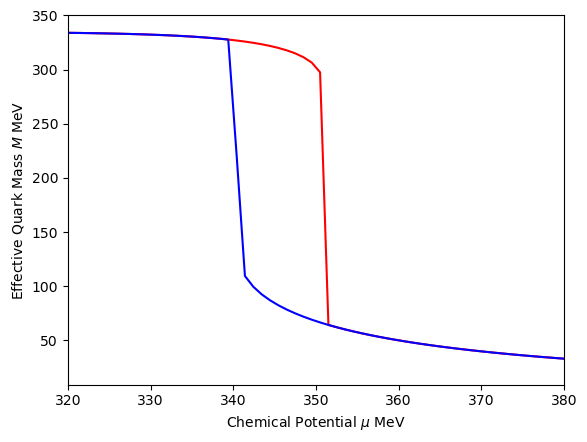

In [6]:
mu_values = result[0]
M_value0 = result[1]
M_value1 = result[2]

fig, ax = plt.subplots()

ax.plot(mu_values,M_value0,'r',label='M_init = 300 MeV')
ax.plot(mu_values,M_value1,'b',label ='M_init = 60 MeV')
ax.set_xlabel(r"Chemical Potential $\mu$ MeV")
ax.set_ylabel(r'Effective Quark Mass $M$ MeV')
ax.set_xlim([320,380])
fig.text("test")
plt.title(r" M - $\mu$")
plt.grid()
plt.legend()
plt.show()